In [1]:
import collections
from operator import itemgetter
import json

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def ParseJSONtoDict (filename):
    # Read JSON data into the datastore variable
    if filename:
        with open(filename, 'r') as f:
            datastore = json.load(f)
    return datastore


In [3]:
# Store data into JSON
def SaveNodesEdgesinJSON (nodes, edges, fileName):
    with open('json/'+fileName+'Nodes.json', 'w') as json_file:
        json.dump(nodes, json_file)

    with open('json/'+fileName+'Edges.json', 'w') as json_file:
        json.dump(edges, json_file)

In [4]:
class Networks:
    
    def __init__ (self):
        self.scseGraph = nx.Graph()
        self.scseMultiGraph = nx.MultiGraph()
        self.CoauthorGraph = nx.MultiGraph()
        self.CreateScseNetwork()
        self.CreateCoauthorNetwork()
        
    def CreateScseNetwork (self):
        nodes = ParseJSONtoDict('json/ScseStaffNodes.json')
        edges = ParseJSONtoDict('json/ScseStaffEdges.json')
        self.scseGraph.add_nodes_from(nodes)
        self.scseGraph.add_edges_from(edges)
        self.scseMultiGraph.add_nodes_from(nodes)
        self.scseMultiGraph.add_edges_from(edges)
    def CreateCoauthorNetwork (self):
        nodes = ParseJSONtoDict('json/CoauthorNodes.json')
        edges = ParseJSONtoDict('json/CoauthorEdges.json')
        self.CoauthorGraph.add_nodes_from(nodes)
        self.CoauthorGraph.add_edges_from(edges)

        
    def GetScseNetwork(self):
        return self.scseGraph
    
    def GetScseMultiNetwork(self):
        return self.scseMultiGraph
    
    def GetCoauthorNetwork(self):
        return self.CoauthorGraph
# Redundant
#     def GetNumberOfCoAuthors(self):
#         return len(self.CoauthorGraph.nodes)



In [5]:
# inititalize networks class to create networkx graphs
networks = Networks()

In [6]:
#print(networks.GetNumberOfCoAuthors())
print("********************")
#print(networks.authorGraph.edges())
print(networks.CoauthorGraph.number_of_nodes())
print(networks.CoauthorGraph.number_of_edges())


********************
9025
195966


C:\Users\Bryan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


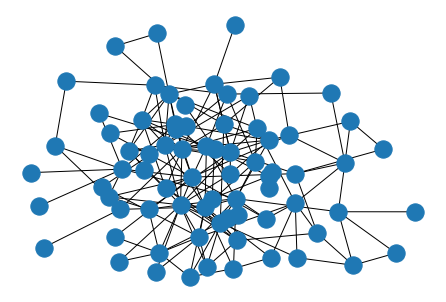

In [7]:
nx.draw_kamada_kawai(networks.GetScseNetwork(),with_labels=False)

In [8]:

# G=nx.Graph()
# G.add_node("a")
# G.add_nodes_from(["b","c"])

# G.add_edge(1,2)
# edge = ("d", "e")
# G.add_edge(*edge)
# edge = ("a", "b")
# G.add_edge(*edge)

# print("Nodes of graph: ")
# print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

In [9]:
#nx.draw(networks.GetScseNetwork(),with_labels=True, font_weight='bold')

In [10]:
#nx.info(networks.GetCoauthorNetwork())
#sort according to degree
mesh = sorted(networks.GetCoauthorNetwork().degree, key=lambda x: x[1], reverse=True)
k = [i[0] for i in mesh]
print(type(mesh))

top_1000 = k[:1085]
print(top_1000)
top_1000graph = networks.GetCoauthorNetwork().subgraph(top_1000).copy()

<class 'list'>
['Dusit Niyato', 'Yang Liu 0003', 'Weisi Lin', 'Chunyan Miao', 'Chen Change Loy', 'Yew-Soon Ong', 'Wentong Cai 0001', 'Ping Wang 0001', 'Jianfei Cai 0001', 'Erik Cambria', 'Yonggang Wen 0001', 'Bu-Sung Lee', 'Anupam Chattopadhyay', 'Haizhou Li 0001', 'Cuntai Guan', 'Bo An 0001', 'Jie Zhang 0002', 'Sourav S. Bhowmick', 'Aixin Sun', 'Thambipillai Srikanthan', 'Gao Cong', 'Zhiqi Shen', 'Han Yu 0001', 'Hanwang Zhang', 'Shijian Lu', 'Zhu Han', 'Weichen Liu', 'Jun Sun 0001', 'Wee Keong Ng', 'Dong In Kim', 'Eng Siong Chng', 'Mo Li 0001', 'Jianmin Zheng', 'Rui Tan', 'Chai Kiat Yeo', 'Zehui Xiong', 'Ah-Hwee Tan', 'Ee-Peng Lim', 'A. S. Madhukumar', 'Jin Song Dong', 'Mahardhika Pratama', 'Guosheng Lin', 'Jun Zhao 0007', 'Chee Keong Kwoh 0001', 'Xiong Xiao', 'Kai Keng Ang', 'Dinh Thai Hoang', 'Cyril Leung', 'Anwitaman Datta', 'Lei Ma 0003', 'Engsiong Chng', 'Xiaofei Xie', 'Xueyan Tang', 'Chai Quek', 'Stephen John Turner', 'Hock Soon Seah', 'Chengzheng Sun', 'Liang-Tien Chia', 'Qiang

In [11]:
nx.info(top_1000graph)

'Name: \nType: MultiGraph\nNumber of nodes: 1085\nNumber of edges: 82144\nAverage degree: 151.4175'

In [230]:
#G = nx.path_graph(4)
centrality = nx.eigenvector_centrality(networks.GetScseNetwork())
sorted((v, f"{c:f}") for v, c in centrality.items())
#sorted([(c, v) for v, c in centrality.items()], reverse = True)
#print(centrality)

[('A. S. Madhukumar', '0.051016'),
 ('Ah-Hwee Tan', '0.156476'),
 ('Aixin Sun', '0.181212'),
 ('Alexei Sourin', '0.000000'),
 ('Anupam Chattopadhyay', '0.026929'),
 ('Anwitaman Datta', '0.103969'),
 ('Arijit Khan', '0.033558'),
 ('Arvind Easwaran', '0.013983'),
 ('Bo An 0001', '0.178003'),
 ('Bu-Sung Lee', '0.339166'),
 ('Chai Kiat Yeo', '0.115836'),
 ('Chee Keong Kwoh 0001', '0.061706'),
 ('Chen Change Loy', '0.043740'),
 ('Cheng Long', '0.013073'),
 ('Chengzheng Sun', '0.026234'),
 ('Chiew Tong Lau', '0.145942'),
 ('Chng Eng Siong', '0.032122'),
 ('Chunyan Miao', '0.332262'),
 ('Cuntai Guan', '0.056707'),
 ('Deepu Rajan', '0.132490'),
 ('Douglas L. Maskell', '0.005338'),
 ('Dusit Niyato', '0.269769'),
 ('Erik Cambria', '0.060224'),
 ('Feng Lin 0002', '0.000000'),
 ('Gao Cong', '0.106530'),
 ('Guosheng Lin', '0.123030'),
 ('Han Yu 0001', '0.198445'),
 ('Hanwang Zhang', '0.074078'),
 ('Hiok Chai Quek', '0.031838'),
 ('Hong Lye Oh', '0.055838'),
 ('Jagath C. Rajapakse', '0.009895'),
 ('

In [229]:
tier1 = [] 
for node in networks.GetScseNetwork().nodes.data():
    if node[1]["tier1cnt"] > 0:
        tier1.append(node[0])
print(tier1)

['Cheng Long', 'Jun Zhao 0007', 'Chee Keong Kwoh 0001', 'Xueyan Tang', 'Arijit Khan', 'Wentong Cai 0001', 'Gao Cong', 'Aixin Sun', 'Sinno Jialin Pan', 'Bo An 0001', 'Chiew Tong Lau', 'Erik Cambria', 'Mahardhika Pratama', 'Anwitaman Datta', 'Chunyan Miao', 'Sourav S. Bhowmick', 'Wee Keong Ng']


In [13]:
def GetScseDegreeDistribution(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    degList, degCountList = zip(*degreeCount.items())

    N = len(graph.nodes)
    pk = []
    for cnt in degCountList:
        pk.append(cnt/N)

    degList = sorted(degList)
    pk = sorted(pk, reverse=True)

    plt.figure()
    plt.scatter(degList, pk, c="r", s=10)

    plt.yscale('log')
    plt.xscale('log')

    axes = plt.gca()
    axes.set_xlim([0.9,max(degList)])
    axes.set_ylim([min(pk)*0.5, 1])

    plt.title("Author Degree Distribution")
    plt.ylabel("Pk")
    plt.xlabel("Degree")
    # plt.savefig("AuthorDegreeDistribution.png")
    # graph too large to be drawn, but algorithms based on degree etc, can be done
    return plt, degList, pk

(<module 'matplotlib.pyplot' from 'C:\\Users\\Bryan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17],
 [0.18666666666666668,
  0.13333333333333333,
  0.10666666666666667,
  0.09333333333333334,
  0.08,
  0.08,
  0.08,
  0.05333333333333334,
  0.04,
  0.04,
  0.02666666666666667,
  0.02666666666666667,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334])

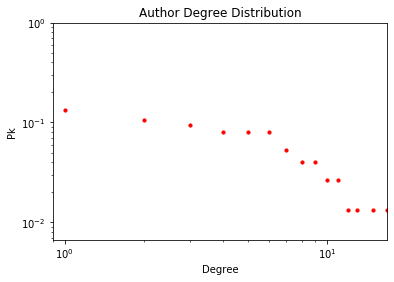

In [14]:
GetScseDegreeDistribution(networks.GetScseNetwork())

In [50]:
def FilterScseYear(Graph, startyear=2000, endyear=2020, min=1, minSuccess = 0):
    filteredNodes = []
    varyingyear = startyear
    results = []
    
    while (varyingyear <= endyear):

        for node in Graph.nodes.data():
            if node[1]['start'] < varyingyear and node[1]['end'] > varyingyear:
                filteredNodes.append(node[0])

        subGraph = Graph.subgraph(filteredNodes).copy()
        results.append(nx.info(subGraph))
        print("year ",varyingyear)
        print(nx.info(subGraph))
        density = nx.density(subGraph)
        print("Network density:", density)
#        print(nx.is_connected(Graph))
        components = nx.connected_components(subGraph)
#        print(type(components))
        largest_component = max(components, key=len)

        # Create a "subgraph" of just the largest component
        # Then calculate the diameter of the subgraph, just like you did with density.
        #
        subgraph = Graph.subgraph(largest_component)
        diameter = nx.diameter(subgraph)
        print("Network diameter of largest component:", diameter)
        varyingyear += 1

    return results

In [51]:
G = FilterScseYear(networks.GetScseMultiNetwork(), startyear=2000, endyear=2021, min=1, minSuccess = 0)

year  2000
Name: 
Type: MultiGraph
Number of nodes: 30
Number of edges: 1120
Average degree:  74.6667
Network density: 2.574712643678161
Network diameter of largest component: 5
year  2001
Name: 
Type: MultiGraph
Number of nodes: 35
Number of edges: 1512
Average degree:  86.4000
Network density: 2.541176470588235
Network diameter of largest component: 5
year  2002
Name: 
Type: MultiGraph
Number of nodes: 37
Number of edges: 1648
Average degree:  89.0811
Network density: 2.4744744744744747
Network diameter of largest component: 5
year  2003
Name: 
Type: MultiGraph
Number of nodes: 41
Number of edges: 1850
Average degree:  90.2439
Network density: 2.2560975609756095
Network diameter of largest component: 5
year  2004
Name: 
Type: MultiGraph
Number of nodes: 45
Number of edges: 1922
Average degree:  85.4222
Network density: 1.9414141414141415
Network diameter of largest component: 6
year  2005
Name: 
Type: MultiGraph
Number of nodes: 49
Number of edges: 2062
Average degree:  84.1633
Netwo

In [ ]:
print(G)

In [17]:

def DrawGraph(graph):
    nodessize = []
    edgecolors = []
    nodescolor = []

    edgeslist = graph.edges.data()

    for node in graph.nodes.data():
        nodessize.append(node[1]['size'])
        if node[1]['tier'] == 1:
            nodescolor.append([1,0,0])
        elif node[1]['tier'] == 2:
            nodescolor.append([1,0.2,0.2])
        elif node[1]['tier'] == 3:
            nodescolor.append([1,0.4,0.4])

    maxSize = max(nodessize)
    minSize = min(nodessize)
    maxNodeSize = 5000
    for size in nodessize:
        size = (size - minSize) / (maxSize -minSize) * maxNodeSize + 1000

    edgemax = max(edgeslist, key=lambda x: x[2]['weight'])[2]['weight']
    edgemin = min(edgeslist, key=lambda x: x[2]['weight'])[2]['weight']
    M = graph.number_of_edges()
    edgealphas = []
    for edge in edgeslist:
        weight = edge[2]['weight']
        color = (weight - edgemin) / (edgemax - edgemin)
        edgecolors.append(color)
        edgealphas.append(color)

    # plt.figure(figsize=(20,20))
    pos=nx.spring_layout(graph, k=5)

    nx.draw_networkx_nodes(
        graph,
        pos=pos,
        node_color=nodescolor,
        node_size=nodessize
    )

    edges = nx.draw_networkx_edges(
        graph,
        pos=pos,
        arrowstyle="->",
        arrowsize=5,
        edge_color=edgecolors,
        edge_cmap=plt.cm.Greys,
        width=1,
    )

    nx.draw_networkx_labels(
        graph, pos=pos, font_size=6,
        font_color='k', font_family='sans-serif',
        font_weight='normal', alpha=None,
        bbox=None, ax=None
    )

    # set alpha value for each edge
    for i in range(M):
        edges[i].set_alpha(edgealphas[i])


In [18]:
DrawGraph(G)

AttributeError: 'list' object has no attribute 'edges'

In [19]:
print(type(G))

<class 'list'>


In [20]:
#filterby: 'management','position','area'
#rank(management): "Y"
def filterGraphs(graph, filterby, rank1, rank2 = None):
    filteredNodes= []
    if rank2:
        for node in graph.nodes.data():
            if node[1][filterby] == rank1 or node[1][filterby]== rank2:
                filteredNodes.append(node[0])
    else:
        for node in graph.nodes.data():
            if node[1][filterby] == rank1:
                filteredNodes.append(node[0])

    subGraph = graph.subgraph(filteredNodes).copy()
    print(filteredNodes)
    return subGraph

In [107]:
def compare2(Graph,title,rank1,rank2):
    first = filterGraphs(Graph,title,rank1)
    print(rank1)
    print(nx.info(first))
    second = filterGraphs(Graph,title,rank2)
    print(rank2)
    print(nx.info(second))
    third = filterGraphs(Graph,title,rank1,rank2)
    print(nx.info(third))
    edge_diff = third.number_of_edges() - (first.number_of_edges() + second.number_of_edges())
    print("****************")
    print(edge_diff)
#print(nx.info(Profs))

In [211]:
compare2(networks.GetScseMultiNetwork(),"area","Distributed Systems","Computer Graphics")

['Xueyan Tang', 'Wentong Cai 0001', 'Anwitaman Datta']
Distributed Systems
Name: 
Type: MultiGraph
Number of nodes: 3
Number of edges: 68
Average degree:  45.3333
['Alexei Sourin', 'Jianmin Zheng', 'Seah Hock Soon']
Computer Graphics
Name: 
Type: MultiGraph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333
['Xueyan Tang', 'Alexei Sourin', 'Wentong Cai 0001', 'Jianmin Zheng', 'Anwitaman Datta', 'Seah Hock Soon']
Name: 
Type: MultiGraph
Number of nodes: 6
Number of edges: 70
Average degree:  23.3333
****************
0


In [102]:

# color_map = []
# for node in tgt.node.data():
#     if node[1]['position'] == "Professor":
#         color_map.append('blue')
#     else: 
#         color_map.append('green')      
# nx.draw_kamada_kawai(tgt, node_color=color_map)
# #nx.draw_random(tgt, node_color=color_map)
# plt.show()

In [215]:
print(nx.info(top_1000graph))
print("****************************")
# print(nx.clustering(networks.GetCoauthorNetwork()))
# centrality = nx.eigenvector_centrality(networks.GetCoauthorNetwork())
# print("****************************")
# print(sorted((v, f"{c:0.2f}") for v, c in centrality.items()))
# print("*****************************")
density = nx.density(top_1000graph)
print("Network density:", density)

Name: 
Type: MultiGraph
Number of nodes: 1085
Number of edges: 82144
Average degree: 151.4175
****************************
Network density: 0.13968405121839236


In [216]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(top_1000graph))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(top_1000graph)
print(type(components))
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = top_1000graph.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
<class 'generator'>
Network diameter of largest component: 6


In [ ]:
#https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#lesson-goals

In [ ]:
nx.degree_histogram(tgt)

['Cheng Long', 'Jun Zhao 0007', 'Chee Keong Kwoh 0001', 'Xueyan Tang', 'Arijit Khan', 'Wentong Cai 0001', 'Gao Cong', 'Aixin Sun', 'Sinno Jialin Pan', 'Bo An 0001', 'Chiew Tong Lau', 'Erik Cambria', 'Mahardhika Pratama', 'Anwitaman Datta', 'Chunyan Miao', 'Sourav S. Bhowmick', 'Wee Keong Ng']
